# Loading the data

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef,roc_auc_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [122]:
data=pd.read_csv(r'./cancer-risk-factors.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               2000 non-null   object 
 1   Cancer_Type              2000 non-null   object 
 2   Age                      2000 non-null   int64  
 3   Gender                   2000 non-null   int64  
 4   Smoking                  2000 non-null   int64  
 5   Alcohol_Use              2000 non-null   int64  
 6   Obesity                  2000 non-null   int64  
 7   Family_History           2000 non-null   int64  
 8   Diet_Red_Meat            2000 non-null   int64  
 9   Diet_Salted_Processed    2000 non-null   int64  
 10  Fruit_Veg_Intake         2000 non-null   int64  
 11  Physical_Activity        2000 non-null   int64  
 12  Air_Pollution            2000 non-null   int64  
 13  Occupational_Hazards     2000 non-null   int64  
 14  BRCA_Mutation           

# Pre-processing the data

In [123]:
print(data['Risk_Level'].unique())

['Medium' 'Low' 'High']


In [124]:
risk_weight={'Low':0,'Medium':1,'High':2}
data['Risk_Level']=data['Risk_Level'].map(risk_weight)

In [125]:
print(data['Risk_Level'].unique())

[1 0 2]


In [126]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               2000 non-null   object 
 1   Cancer_Type              2000 non-null   object 
 2   Age                      2000 non-null   int64  
 3   Gender                   2000 non-null   int64  
 4   Smoking                  2000 non-null   int64  
 5   Alcohol_Use              2000 non-null   int64  
 6   Obesity                  2000 non-null   int64  
 7   Family_History           2000 non-null   int64  
 8   Diet_Red_Meat            2000 non-null   int64  
 9   Diet_Salted_Processed    2000 non-null   int64  
 10  Fruit_Veg_Intake         2000 non-null   int64  
 11  Physical_Activity        2000 non-null   int64  
 12  Air_Pollution            2000 non-null   int64  
 13  Occupational_Hazards     2000 non-null   int64  
 14  BRCA_Mutation           

# Feature Selection

In [127]:
X=data.drop(columns=['Patient_ID','Cancer_Type'])
y=data['Cancer_Type']

In [128]:
print(y.unique())

['Breast' 'Prostate' 'Skin' 'Colon' 'Lung']


In [129]:
print(X.head(),y.head())

   Age  Gender  Smoking  ...   BMI  Physical_Activity_Level  Risk_Level
0   68       0        7  ...  28.0                        5           1
1   74       1        8  ...  25.4                        9           1
2   55       1        7  ...  28.6                        2           1
3   61       0        6  ...  32.1                        7           0
4   67       1       10  ...  25.1                        2           1

[5 rows x 19 columns] 0      Breast
1    Prostate
2        Skin
3       Colon
4        Lung
Name: Cancer_Type, dtype: object


In [130]:
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy')

# Training the model
extra_tree_forest.fit(X, y)

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in extra_tree_forest.estimators_],axis = 0)

feature_mapping={}
for i in range(len(X.columns)):
    if feature_importance_normalized[i]>=0.005:
        feature_mapping[X.columns[i]]=feature_importance_normalized[i]

for i in feature_mapping:
    print(i,":",feature_mapping[i])


Age : 0.00645664255401536
Gender : 0.017817079574170763
Smoking : 0.01915083937227567
Obesity : 0.006703013409437418
Diet_Red_Meat : 0.018062330000042554
Physical_Activity : 0.005653926091240076
Air_Pollution : 0.021795841459818617
Occupational_Hazards : 0.010052636922268456
Calcium_Intake : 0.00715012965477334
Overall_Risk_Score : 0.005854321789240778
Physical_Activity_Level : 0.00500403416461822


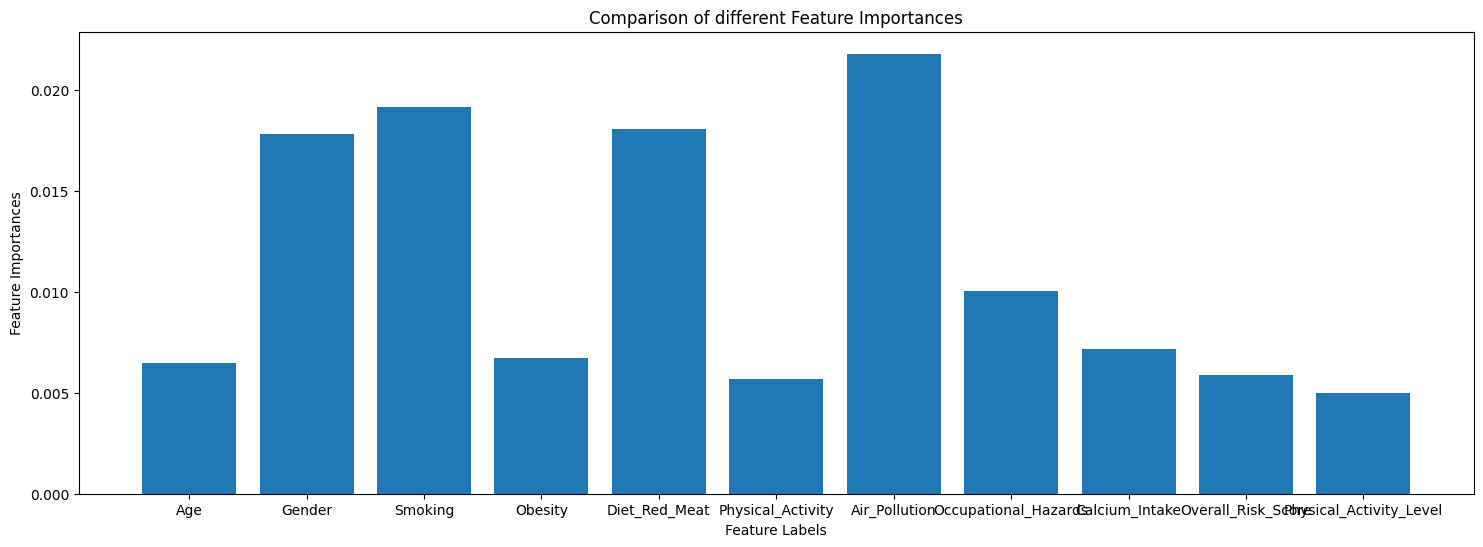

In [131]:
# Plotting a Bar Graph to compare the models
plt.figure(figsize=(18,6))
plt.bar(feature_mapping.keys(),feature_mapping.values())
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [132]:
dropped_columns=[i for i in X.columns if i not in feature_mapping]
print(dropped_columns)

['Alcohol_Use', 'Family_History', 'Diet_Salted_Processed', 'Fruit_Veg_Intake', 'BRCA_Mutation', 'H_Pylori_Infection', 'BMI', 'Risk_Level']


In [133]:
X.drop(columns=dropped_columns,inplace=True)

# Train-test splitting

In [134]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=101)
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# printing out train and test sets

print('X_train : ')
print(X_train)

print('')
print('y_train : ')
print(y_train)

(1400, 11)
(600, 11)
(1400,)
(600,)
X_train : 
[[-0.58757694 -0.95118973 -0.93125996 ... -0.9680105   0.10760204
  -0.29970607]
 [ 1.03473526 -0.95118973  1.18327841 ... -1.29559443  0.88528195
   1.59175224]
 [-0.30128655  1.05131497 -1.23333687 ...  0.01474128 -2.76125846
   0.64602308]
 ...
 [ 1.22559552  1.05131497 -1.53541378 ...  0.01474128 -1.35147302
  -0.93019218]
 [-1.4464481  -0.95118973  1.18327841 ...  0.66990913 -1.25743392
   1.27650919]
 [ 0.843875    1.05131497 -0.32710614 ...  0.99749306  0.57113853
   0.33078003]]

y_train : 
1976      Breast
307       Breast
705     Prostate
737         Skin
1725        Lung
          ...   
248     Prostate
1297        Lung
943         Skin
703         Lung
1827    Prostate
Name: Cancer_Type, Length: 1400, dtype: object


# Prediction

In [135]:
print(y_test)

159       Skin
1902      Skin
173       Lung
1514      Lung
1279    Breast
         ...  
820       Skin
1497    Breast
1979      Skin
1362     Colon
1460    Breast
Name: Cancer_Type, Length: 600, dtype: object


## Logistic Regression

In [136]:
logreg = LogisticRegression(solver="lbfgs", C=5) 
logreg.fit(X_train,y_train)
y_pred_log=logreg.predict(X_test)

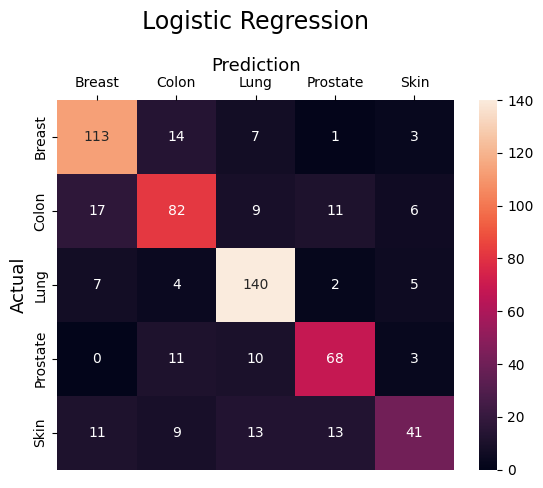

In [137]:
cm = confusion_matrix(np.array(y_test),y_pred_log)
sns.heatmap(cm,annot=True,fmt='g',xticklabels=sorted(y_test.unique()),yticklabels=sorted(y_test.unique()))
plt.ylabel('Actual', fontsize=13)
plt.title('Logistic Regression', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()
plt.show()

In [138]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

      Breast       0.76      0.82      0.79       138
       Colon       0.68      0.66      0.67       125
        Lung       0.78      0.89      0.83       158
    Prostate       0.72      0.74      0.73        92
        Skin       0.71      0.47      0.57        87

    accuracy                           0.74       600
   macro avg       0.73      0.71      0.72       600
weighted avg       0.74      0.74      0.73       600



## 2. Decision Tree Classifier

In [139]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_dtc=dtc.predict(X_test)

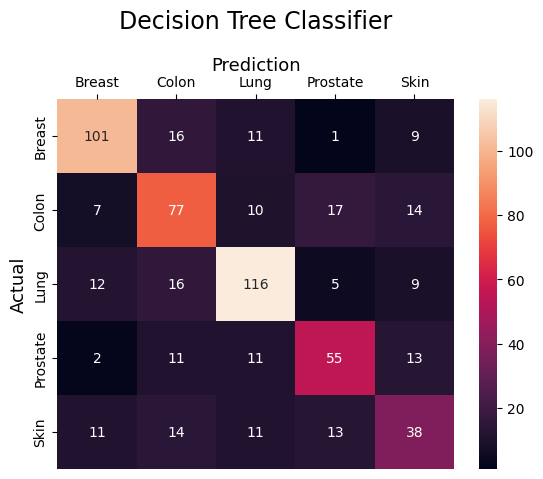

In [140]:
cm = confusion_matrix(np.array(y_test),y_pred_dtc)
sns.heatmap(cm,annot=True,fmt='g',xticklabels=sorted(y_test.unique()),yticklabels=sorted(y_test.unique()))
plt.ylabel('Actual', fontsize=13)
plt.title('Decision Tree Classifier', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()
plt.show()

In [141]:
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

      Breast       0.76      0.73      0.75       138
       Colon       0.57      0.62      0.59       125
        Lung       0.73      0.73      0.73       158
    Prostate       0.60      0.60      0.60        92
        Skin       0.46      0.44      0.45        87

    accuracy                           0.65       600
   macro avg       0.63      0.62      0.62       600
weighted avg       0.65      0.65      0.65       600



## 3. K-Nearest Neighbor Classifier

In [142]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)

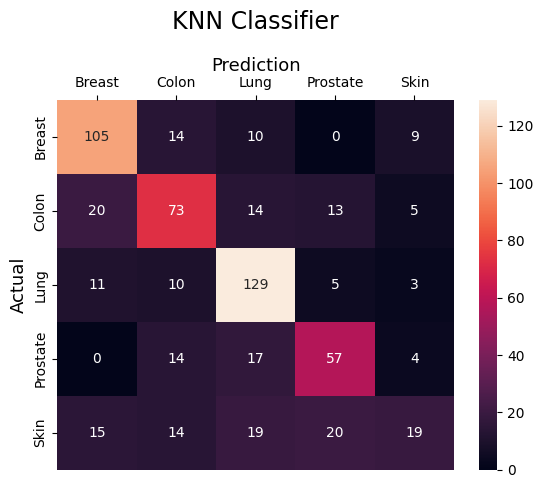

In [143]:
cm = confusion_matrix(np.array(y_test),y_pred_knn)
sns.heatmap(cm,annot=True,fmt='g',xticklabels=sorted(y_test.unique()),yticklabels=sorted(y_test.unique()))
plt.ylabel('Actual', fontsize=13)
plt.title('KNN Classifier', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()
plt.show()

In [144]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

      Breast       0.70      0.76      0.73       138
       Colon       0.58      0.58      0.58       125
        Lung       0.68      0.82      0.74       158
    Prostate       0.60      0.62      0.61        92
        Skin       0.47      0.22      0.30        87

    accuracy                           0.64       600
   macro avg       0.61      0.60      0.59       600
weighted avg       0.62      0.64      0.62       600



## 4. Naive Bayes Classifier - Gaussian or Multinomial

In [145]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred_gnb=gnb.predict(X_test)

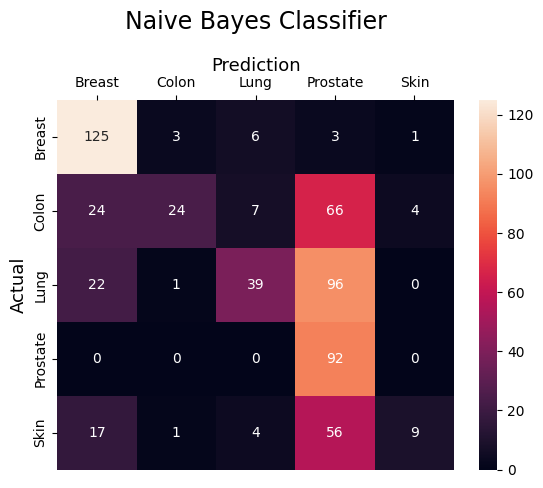

In [146]:
cm = confusion_matrix(np.array(y_test),y_pred_gnb)
sns.heatmap(cm,annot=True,fmt='g',xticklabels=sorted(y_test.unique()),yticklabels=sorted(y_test.unique()))
plt.ylabel('Actual', fontsize=13)
plt.title('Naive Bayes Classifier', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()
plt.show()

In [147]:
print(classification_report(y_test,y_pred_gnb))

              precision    recall  f1-score   support

      Breast       0.66      0.91      0.77       138
       Colon       0.83      0.19      0.31       125
        Lung       0.70      0.25      0.36       158
    Prostate       0.29      1.00      0.45        92
        Skin       0.64      0.10      0.18        87

    accuracy                           0.48       600
   macro avg       0.63      0.49      0.42       600
weighted avg       0.65      0.48      0.43       600



## 5. Ensemble Model - Random Forest

In [148]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred_rfc=rfc.predict(X_test)

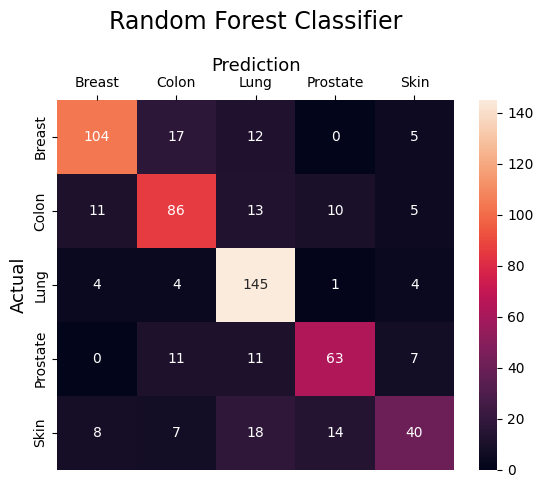

In [149]:
cm = confusion_matrix(np.array(y_test),y_pred_rfc)
sns.heatmap(cm,annot=True,fmt='g',xticklabels=sorted(y_test.unique()),yticklabels=sorted(y_test.unique()))
plt.ylabel('Actual', fontsize=13)
plt.title('Random Forest Classifier', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()
plt.show()

In [150]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

      Breast       0.82      0.75      0.78       138
       Colon       0.69      0.69      0.69       125
        Lung       0.73      0.92      0.81       158
    Prostate       0.72      0.68      0.70        92
        Skin       0.66      0.46      0.54        87

    accuracy                           0.73       600
   macro avg       0.72      0.70      0.71       600
weighted avg       0.73      0.73      0.72       600



## 6. Ensemble Model - XGBoost

In [151]:
xgb=XGBClassifier(objective="multi:softprob",num_class=5,eval_metric="mlogloss")
le=LabelEncoder()
xgb.fit(X_train,le.fit_transform(y_train))
y_pred_xgb=le.inverse_transform(xgb.predict(X_test))

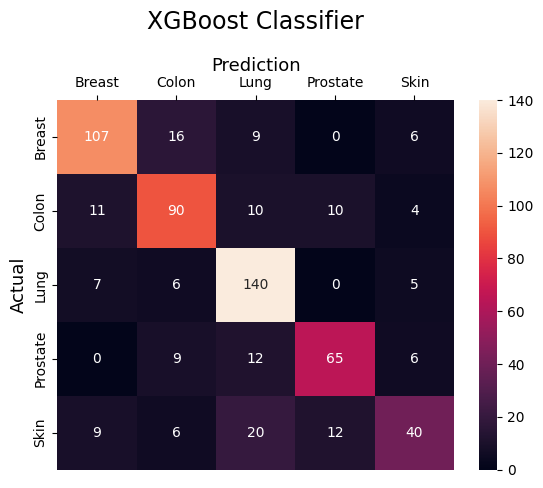

In [152]:
cm = confusion_matrix(np.array(y_test),y_pred_xgb)
sns.heatmap(cm,annot=True,fmt='g',xticklabels=sorted(y_test.unique()),yticklabels=sorted(y_test.unique()))
plt.ylabel('Actual', fontsize=13)
plt.title('XGBoost Classifier', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()
plt.show()

In [153]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

      Breast       0.80      0.78      0.79       138
       Colon       0.71      0.72      0.71       125
        Lung       0.73      0.89      0.80       158
    Prostate       0.75      0.71      0.73        92
        Skin       0.66      0.46      0.54        87

    accuracy                           0.74       600
   macro avg       0.73      0.71      0.71       600
weighted avg       0.73      0.74      0.73       600



# Accuracy Metrics

In [154]:
def true_positive(y_true, y_pred,c):
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == c and yp == c:
            tp += 1
    return tp

def true_negative(y_true, y_pred,c):
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt !=c and yp != c:
            tn += 1
    return tn

def false_positive(y_true, y_pred,c):
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt != c and yp == c:
            fp += 1
    return fp

def false_negative(y_true, y_pred,c):
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == c and yp != c:
            fn += 1
    return fn

def accuracy(y_true, y_pred,c):
    tp=true_positive(y_true,y_pred,c)
    tn=true_negative(y_true,y_pred,c)
    fp=false_positive(y_true,y_pred,c)
    fn=false_negative(y_true,y_pred,c)
    return (tp+tn)/(tp+tn+fp+fn)

def precision(y_true, y_pred,c):
    tp=true_positive(y_true,y_pred,c)
    fp=false_positive(y_true,y_pred,c)    
    return tp/(tp+fp)

def recall(y_true, y_pred,c):
    tp=true_positive(y_true,y_pred,c)
    fn=false_negative(y_true,y_pred,c)    
    return tp/(tp+fn)

def f1(y_true, y_pred,c):
    p=precision(y_true,y_pred,c)
    r=recall(y_true,y_pred,c)    
    return 2*p*r/(p+r)

def macro_accuracy(y_true, y_pred, lst):
    val=0
    for i in lst:
        val+=accuracy(y_true,y_pred,i)
    return val/len(lst)

def macro_precision(y_true, y_pred, lst):
    val=0
    for i in lst:
        val+=precision(y_true,y_pred,i)
    return val/len(lst)

def macro_recall(y_true, y_pred, lst):
    val=0
    for i in lst:
        val+=recall(y_true,y_pred,i)
    return val/len(lst)

def macro_f1(y_true, y_pred, lst):
    val=0
    for i in lst:
        val+=f1(y_true,y_pred,i)
    return val/len(lst)

lst=list(y_train.unique())


In [155]:
print("For Logistic Regresion")
model=logreg
y_pred_m=y_pred_log
print("Accuracy: ",macro_accuracy(y_test,y_pred_m,lst)*100)
print("Precision: ",macro_precision(y_test,y_pred_m,lst)*100)
print("Recall: ",macro_recall(y_test,y_pred_m,lst)*100)
print("F1: ",macro_f1(y_test,y_pred_m,lst)*100)
print("MCC: ",matthews_corrcoef(y_test,y_pred_m)*100)
print("AUC: ",roc_auc_score(y_test,model.predict_proba(X_test),multi_class='ovr')*100)

For Logistic Regresion
Accuracy:  89.60000000000001
Precision:  73.03311554566257
Recall:  71.42622663351868
F1:  71.66496096176995
MCC:  67.03890630581803
AUC:  93.73896930499896


In [156]:
print("For Decision Tree Classifier")
model=dtc
y_pred_m=y_pred_dtc
print("Accuracy: ",macro_accuracy(y_test,y_pred_m,lst)*100)
print("Precision: ",macro_precision(y_test,y_pred_m,lst)*100)
print("Recall: ",macro_recall(y_test,y_pred_m,lst)*100)
print("F1: ",macro_f1(y_test,y_pred_m,lst)*100)
print("MCC: ",matthews_corrcoef(y_test,y_pred_m)*100)
print("AUC: ",roc_auc_score(y_test,model.predict_proba(X_test),multi_class='ovr')*100)

For Decision Tree Classifier
Accuracy:  85.8
Precision:  62.5162408007345
Recall:  62.33337938625624
F1:  62.39989933823157
MCC:  55.04068533765045
AUC:  76.71534392197542


In [157]:
print("For KNN Classifier")
y_pred_m=y_pred_knn
model=knn
print("Accuracy: ",macro_accuracy(y_test,y_pred_m,lst)*100)
print("Precision: ",macro_precision(y_test,y_pred_m,lst)*100)
print("Recall: ",macro_recall(y_test,y_pred_m,lst)*100)
print("F1: ",macro_f1(y_test,y_pred_m,lst)*100)
print("MCC: ",matthews_corrcoef(y_test,y_pred_m)*100)
print("AUC: ",roc_auc_score(y_test,model.predict_proba(X_test),multi_class='ovr')*100)

For KNN Classifier
Accuracy:  85.53333333333333
Precision:  60.73807841900558
Recall:  59.98562566817858
F1:  59.25995431268809
MCC:  54.06908690230405
AUC:  86.93873770122971


In [158]:
print("For Gaussian NB Classifier")
y_pred_m=y_pred_gnb
model=gnb
print("Accuracy: ",macro_accuracy(y_test,y_pred_m,lst)*100)
print("Precision: ",macro_precision(y_test,y_pred_m,lst)*100)
print("Recall: ",macro_recall(y_test,y_pred_m,lst)*100)
print("F1: ",macro_f1(y_test,y_pred_m,lst)*100)
print("MCC: ",matthews_corrcoef(y_test,y_pred_m)*100)
print("AUC: ",roc_auc_score(y_test,model.predict_proba(X_test),multi_class='ovr')*100)

For Gaussian NB Classifier
Accuracy:  79.26666666666667
Precision:  62.51390501327213
Recall:  48.96161640698639
F1:  41.51168536154788
MCC:  41.731884052906324
AUC:  82.45654100306288


In [159]:
print("For Random Forest Classifier")
y_pred_m=y_pred_rfc
model=rfc
print("Accuracy: ",macro_accuracy(y_test,y_pred_m,lst)*100)
print("Precision: ",macro_precision(y_test,y_pred_m,lst)*100)
print("Recall: ",macro_recall(y_test,y_pred_m,lst)*100)
print("F1: ",macro_f1(y_test,y_pred_m,lst)*100)
print("MCC: ",matthews_corrcoef(y_test,y_pred_m)*100)
print("AUC: ",roc_auc_score(y_test,model.predict_proba(X_test),multi_class='ovr')*100)

For Random Forest Classifier
Accuracy:  89.2
Precision:  72.14375299405603
Recall:  70.07794862062639
F1:  70.51542261779774
MCC:  65.82881305890976
AUC:  92.5541624800816


In [160]:
print("For XGBoost Classifier")
y_pred_m=y_pred_xgb
model=xgb
print("Accuracy: ",macro_accuracy(y_test,y_pred_m,lst)*100)
print("Precision: ",macro_precision(y_test,y_pred_m,lst)*100)
print("Recall: ",macro_recall(y_test,y_pred_m,lst)*100)
print("F1: ",macro_f1(y_test,y_pred_m,lst)*100)
print("MCC: ",matthews_corrcoef(y_test,y_pred_m)*100)
print("AUC: ",roc_auc_score(y_test,model.predict_proba(X_test),multi_class='ovr')*100)

For XGBoost Classifier
Accuracy:  89.46666666666667
Precision:  72.86034629805522
Recall:  70.95460244561262
F1:  71.40280415118295
MCC:  66.61783941443804
AUC:  93.51095995284527
